# Benchmark results

This section investigates how scalable is our software. We report median run time, memory usage, and iteration number for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and a single core 3.3GHz processor. 

In [1]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using StatsPlots
using Measures

In [2]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"
dir_negativebinomial = "negativebinomial_results"
dir_negativebinomial_nodebias = "negativebinomial_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson; dir_negativebinomial; dir_negativebinomial_nodebias]

8-element Array{String,1}:
 "normal_results_nodebias"          
 "normal_results"                   
 "logistic_results_nodebias"        
 "logistic_results"                 
 "poisson_results_nodebias"         
 "poisson_results"                  
 "negativebinomial_results"         
 "negativebinomial_results_nodebias"

## First read the benchmark results in, and print out failed results

In [3]:
all_benchmark_results = Vector{Matrix}(undef, 8)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir  = dir * "/" * string(10000i) * "_by_1000000_run$j"
            file_dir2 = dir * "/" * string(10000i + 300) * "_by_1000000_run$j"
            
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            elseif isfile(file_dir2)
                tmp_run = readdlm(file_dir2, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            else
                println(string(10000i) * " run $j for " * dir * " does not exist")
            end
        end
        
        cur_response[i, 1] = median(a_particular_run[:, 1])
        cur_response[i, 2] = median(a_particular_run[:, 2])
        cur_response[i, 3] = median(a_particular_run[:, 3])
    end
    all_benchmark_results[k] = cur_response
end

20000 run 3 for normal_results_nodebias does not exist
70000 run 3 for normal_results_nodebias does not exist
70000 run 4 for normal_results_nodebias does not exist
40000 run 5 for normal_results does not exist
50000 run 1 for normal_results does not exist
120000 run 5 for normal_results does not exist
120000 run 5 for poisson_results does not exist
90000 run 3 for negativebinomial_results_nodebias does not exist
120000 run 4 for negativebinomial_results_nodebias does not exist


In [4]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]
negativebinomial_results_nodebias = all_benchmark_results[7]
negativebinomial_results = all_benchmark_results[8]

12×3 Array{Float64,2}:
  51.5576  1.38346    160.0
 152.99    0.0684439    2.0
 228.332   0.0705239    2.0
 206.056   0.826766    64.0
 380.255   0.0746839    2.0
 455.963   0.0767639    2.0
 370.751   0.289463    22.0
 430.303   0.252617    16.0
 683.422   0.0830039    2.0
 525.7     0.362147    26.0
 576.917   0.436974    30.0
 640.816   0.315368    18.0

# Plot time/memory/iter, separating debias and no-debias

In [15]:
storage = 1000 .* model_sizes .* 10^7 * .2 .* 1.25e-10

no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] negativebinomial_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1] negativebinomial_results[:, 1]]
no_debias_memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] negativebinomial_results_nodebias[:, 2] storage]
yes_debias_memory = [normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2] negativebinomial_results[:, 2] storage]
no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] negativebinomial_results_nodebias[:, 3]]
yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3] negativebinomial_results[:, 3]]

12×4 Array{Float64,2}:
 3.0  5.0  14.0  160.0
 2.0  2.0  45.0    2.0
 2.0  7.0  15.0    2.0
 2.0  2.0  17.0   64.0
 2.0  4.0  21.0    2.0
 3.0  5.0  95.0    2.0
 2.0  3.0  16.0   22.0
 2.0  6.0  13.0   16.0
 2.0  6.0   6.0    2.0
 2.0  2.0   6.0   26.0
 2.0  6.0  24.0   30.0
 2.0  2.0   9.0   18.0

## Begin plotting

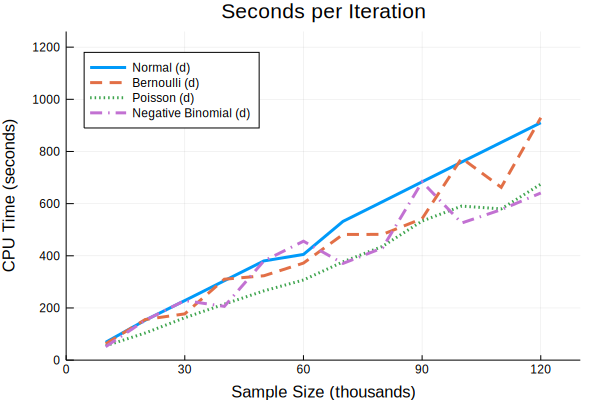

In [7]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Binomial (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

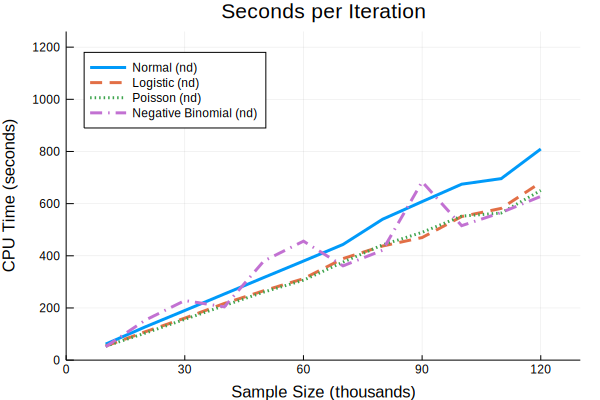

In [8]:
no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (nd)" "Logistic (nd)" "Poisson (nd)" "Negative Binomial (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

In [31]:
#(d) = yes debias, (nd) = no-debias

yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

yes_debias_iter_plot = plot(model_sizes, yes_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 180),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations")

no_debias_iter_plot = plot(model_sizes, no_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"],
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 180),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations");

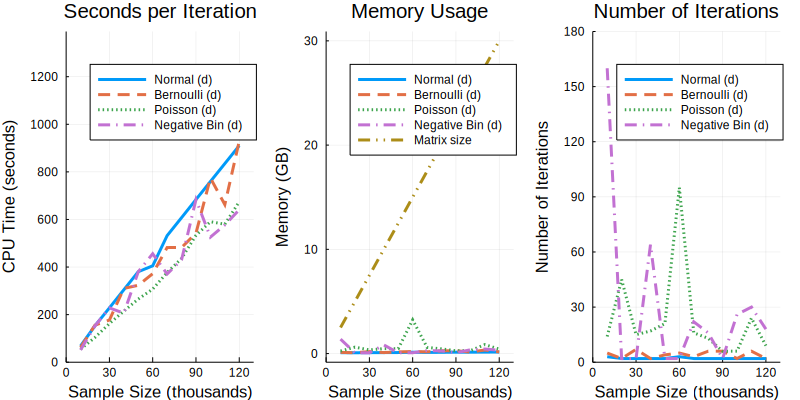

In [32]:
yes_debias_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot]
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400))

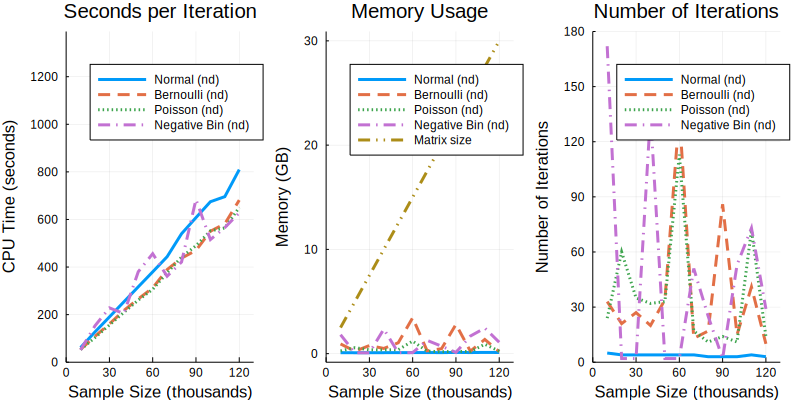

In [33]:
no_debias_plots = [no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400))

# Save previous 2 plots in high resolution

In [34]:
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
savefig(yes_debias, "yes_debias")
savefig(no_debias, "no_debias")

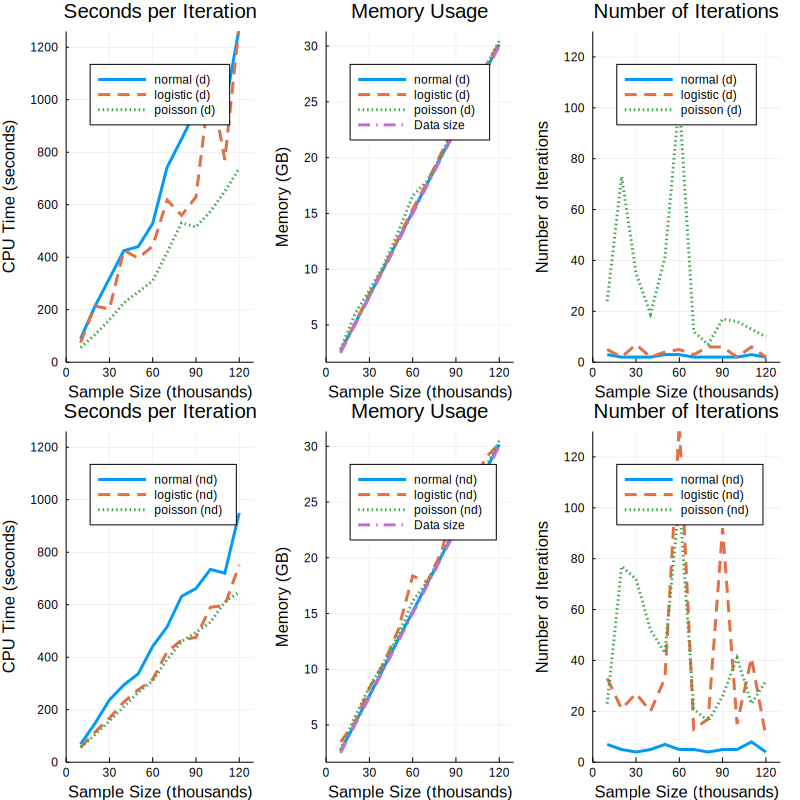

In [78]:
all_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
plt = plot(all_plots..., layout = (2,3), size = (800, 800))

# Debias/no-debiasing in the same plot (looks like shit)

In [108]:
times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1]]
memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2]]
iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3]]


12×6 Array{Float64,2}:
 7.0   33.0   23.0  3.0  5.0   24.0
 5.0   21.0   77.0  2.0  2.0   73.0
 4.0   27.0   72.0  2.0  7.0   35.0
 5.0   20.0   52.0  2.0  2.0   19.0
 7.0   33.0   43.0  3.0  4.0   41.0
 5.0  133.0  103.0  3.0  5.0  103.0
 5.0   13.0   21.0  2.0  3.0   12.0
 4.0   17.0   16.0  2.0  6.0    7.0
 5.0   92.0   26.0  2.0  6.0   17.0
 5.0   15.0   41.0  2.0  2.0   16.0
 8.0   41.0   23.0  3.0  6.0   13.0
 4.0   10.0   32.0  2.0  2.0   10.0

In [111]:
model_sizes = collect(10:10:120)

#(nd) = no debias
#(d) = yes debias

times_plot = plot(model_sizes, times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, xlim = (0, 130), title = "Seconds per Iteration",
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto],
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"])

memory_plot = plot(model_sizes, memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (MB)", w=3, title = "Memory Usage", xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto], 
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"])

iter_plot = plot(model_sizes, iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, xlim = (0, 130), title = "Number of Iterations",
    linestyle = [:solid :dash :dot :dashdot :dashdotdot :auto],
    lab = ["normal (nd)" "logistic (nd)" "poisson (nd)" "normal (d)" "logistic (d)" "poisson (d)"]);

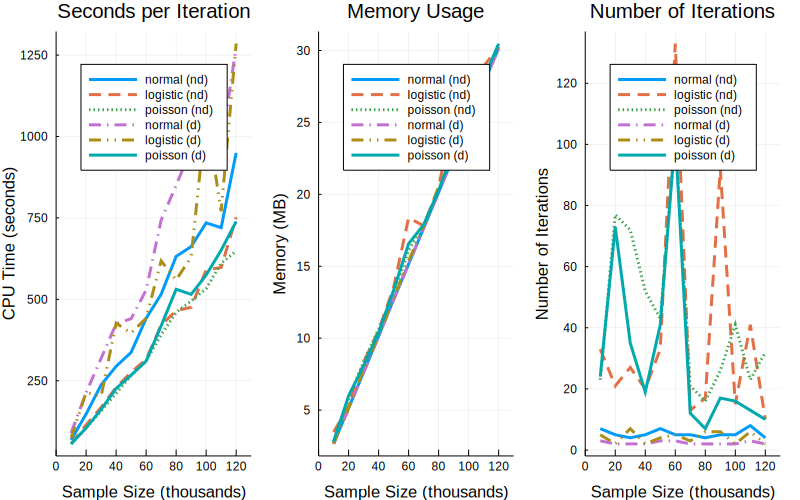

In [118]:
all_plots = [times_plot memory_plot iter_plot]
plt = plot(all_plots..., layout = (1, 3), size = (800, 500))